## Lab 3

In this lab you will:
* Practice aperture photometry
* Perform aperture photometry on a real image
* get familiar with "error" estimates in practice.

### A variety of these problems were already on Lab 1. If you and all your group members are solid on those problems, please move on when indicated to do so. However, if any of you are not, I highly encourage you to redo those problems here just for practice.

CCD images of stars are just arrays. The value of each element in the array are basically the number of photons collected. So you might have:

[[0 , 1, 5,]]

[2, 3, 4]]

As your CCD image. Meaning 0 photons were collected in element (0,0), meaning the first row, first column. 1 photons were collected in element (0, 1), 5 in element (0, 2) etc.

It is just a map of brightness versus position on the sky!

In the following cell, I am going to generate a numpy array that looks like a star. Ignore that code for now, but just look at the resulting image.

In [1]:
import numpy as np

def gaussian(x, y, mu_x, mu_y, width):
     return np.exp(-(1/width*(x-mu_x)**2 + 1/width*(y-mu_y)**2))

synthetic_im = np.zeros((40, 40))
synthetic_im[3:-3,-3:-1] += 2
synthetic_im[10,:] += 1
X, Y = np.meshgrid(np.arange(40), np.arange(40))
synthetic_im += gaussian(X, Y, 20, 20, 3)

We are going to use matplotlib.pyplot to display the image. The syntax for displaying 2d arrays is plt.imshow

<IPython.core.display.Javascript object>


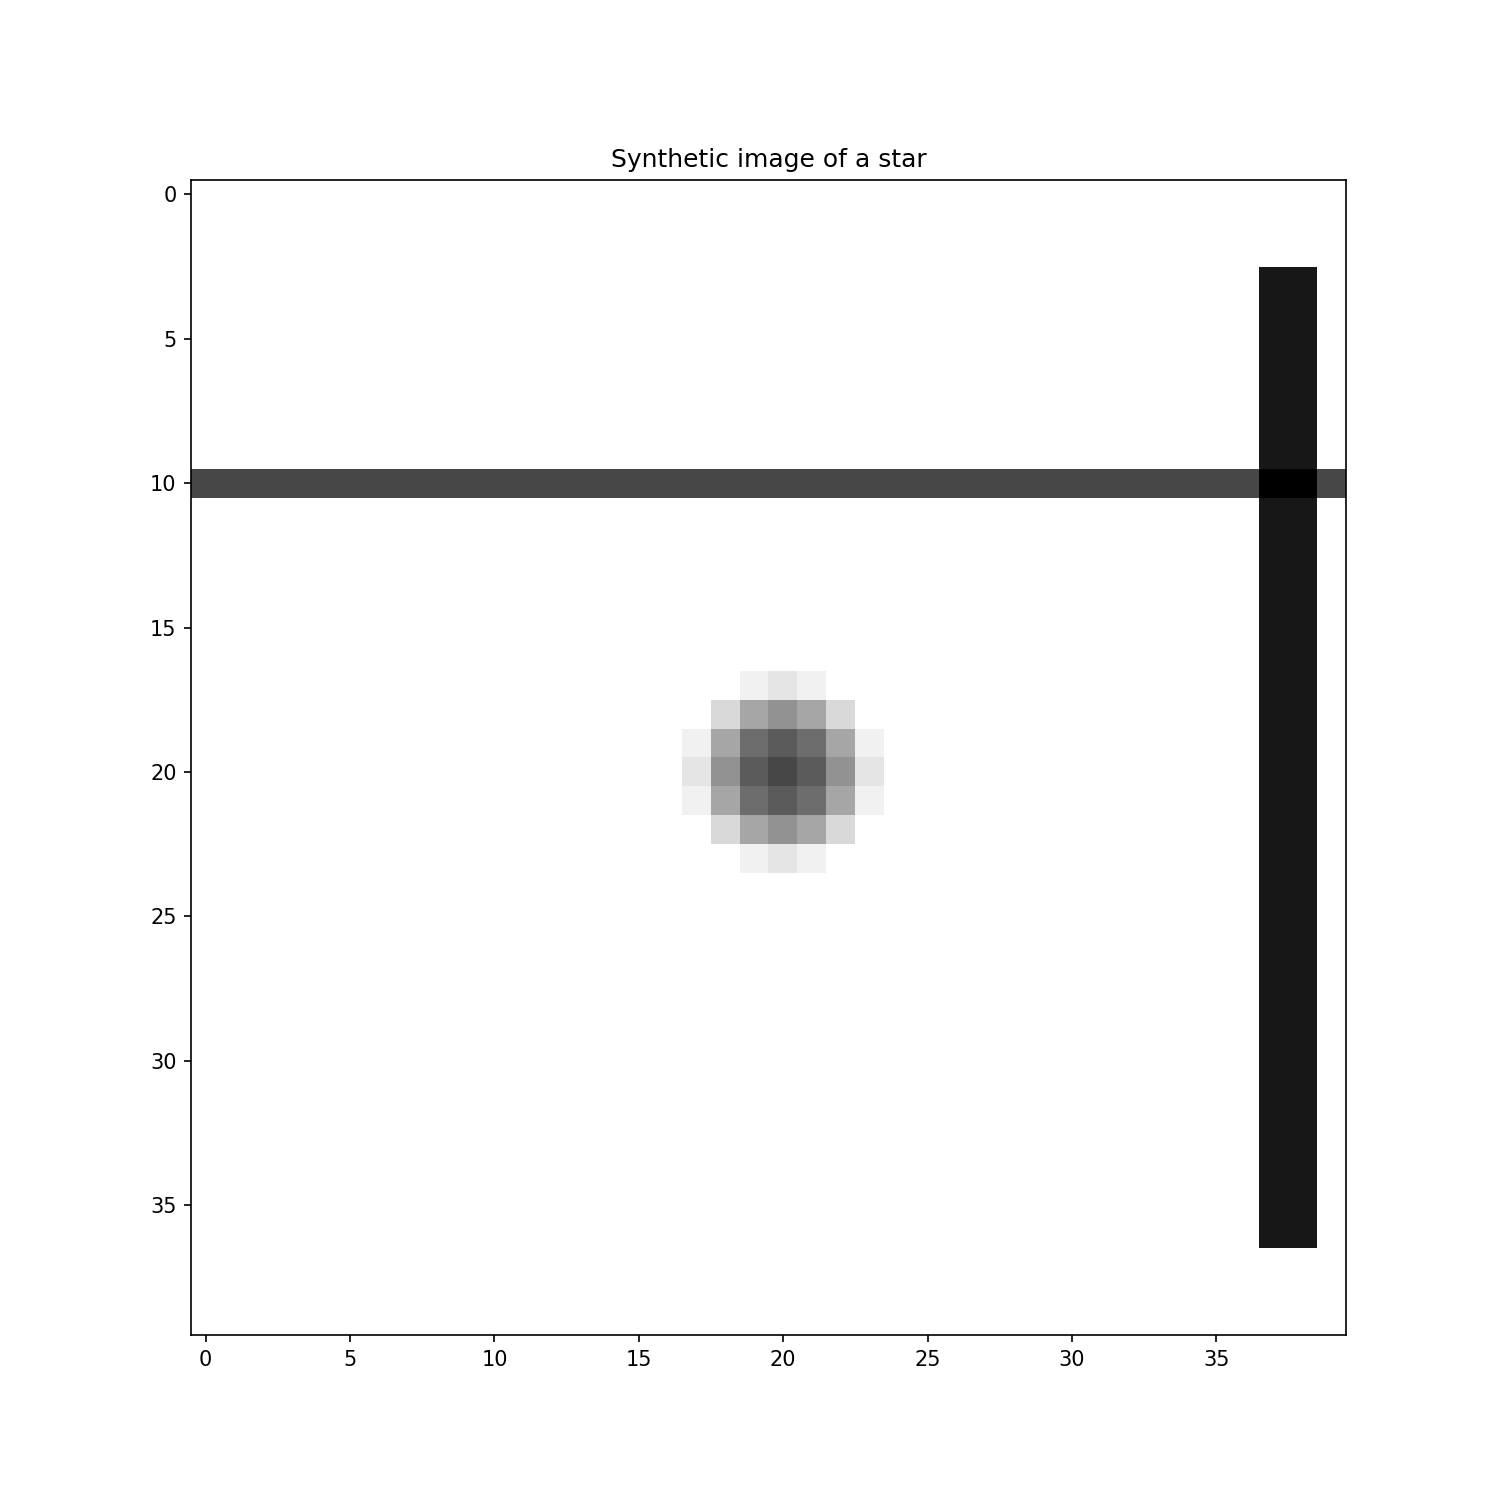

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm # you will use this color scale often

%matplotlib notebook
%matplotlib notebook

plt.figure(figsize=(10, 10))
plt.title('Synthetic image of a star')
plt.imshow(synthetic_im, cmap='Greys', norm=LogNorm(vmin=0.02))
plt.show()

### Problem 4 (if you completed this on Lab 1 already -- then ignore this, write "already completed" in the answer box, and move on):

Now the problem itself: Read the documentation for np.sum(). Use that, along with your knowledge of slicing to pick out regions of an array, to give me the total brightness of the synthetic star. The star is the bright circle at the center.

Note that you can hover your cursor over the image and the bottom Right hand corner will display the (x,y) pixel coordinates of your cursor. Use this to find the location of the star :)

This total brightness will be the sum of all the elements surrounding the star, but excluding the bad regions (the bright strips). These are bright. Many real astronomical images contain such artifacts that you have to work around. Any suitable square region around the star will work. This square region is commonly known as an "aperture". Do this sum in the cell below. 

The answer should be very close to 9.4   (within 0.1 of it) 

The region you are summing over can be visually depicted as a box. This is called "square aperture photometry" and is the simplest way one can measure the brightness of a star in astronomy -- however it is also one of the most robust!

Notice that the axis labels on the sides of the image give the pixel coordinates :)  . Use those to measure the position of the star!

Also another formality here: brightness here is in what is called "detector units". It doesn't have a physical meaning... yet. We have to do some minor calibration to convert from detector units to physical units like a flux. Where flux is the total energy passing through some area in a given time (energy per unit time per unit area).

In [3]:
np.sum(synthetic_im[16:24, 16:24])

9.392134688877505

End of problem 4

Now lets look at a real astronomical image, not just a synthetic one. But, now you have all the machinery necessary to do what is called "photometry". Photometry is, in pragmatic terms, measuring how bright a star is.

Recall our discussion of "photometric standard" stars. These are stars whose brightnesses do not vary much over time. They are standard -- much like the kilogram is a standard of mass.

This is one of the many standard star fields. This field is called SA 112 SF2. The two standard stars 822 and 805 highlighted. From https://ui.adsabs.harvard.edu/abs/2009AJ....137.4186L/abstract


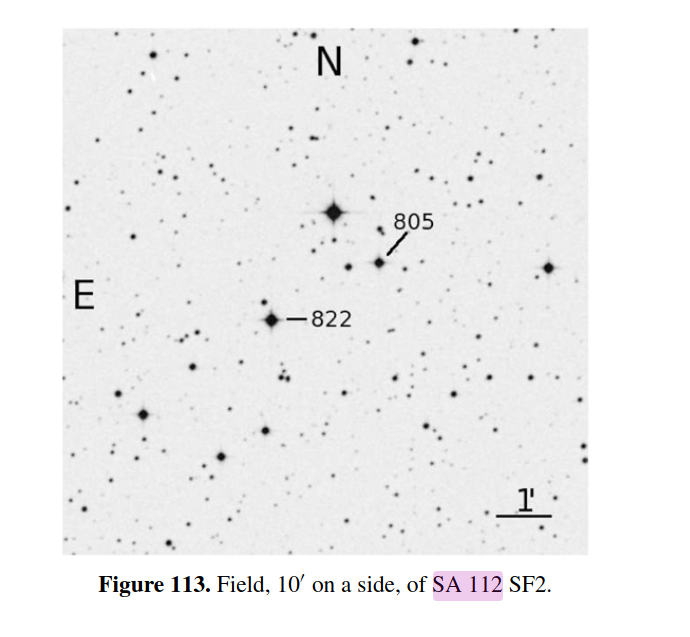

In [4]:
from IPython.display import Image
print('This is one of the many standard star fields. This field is called SA 112 SF2. The two standard stars 822 and 805 highlighted. From https://ui.adsabs.harvard.edu/abs/2009AJ....137.4186L/abstract')
Image('lab1_resources/SA_112_field_SF2.png')

Now we are going to look at a real image of the same field, taken recently (on June 12 2021), with an LCO 0.4 meter telescope. These are the same telescopes that you will be using eventually.

<IPython.core.display.Javascript object>


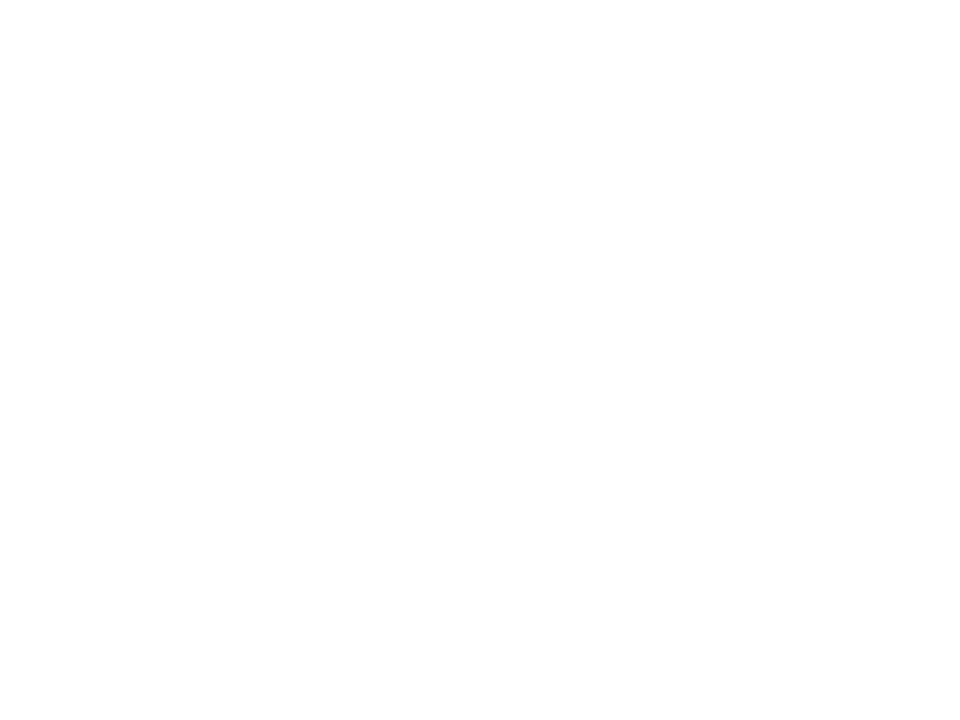

Below is the image. But it does not look so good. Let us mess with the color scale cutoffs to make it look better


In [5]:

from astropy.io import fits

hdu_list = fits.open('lab1_resources/ogg0m406-kb27-20210612-0230-s91.fits.fz')
im = hdu_list[1].data
plt.figure()
plt.imshow(im, norm=LogNorm(), cmap='Greys') # setting the color map (the coloring of the plot to 'Greys')
plt.show()
print('Below is the image. But it does not look so good. Let us mess with the color scale cutoffs to make it look better')

And lets zoom in on the image. This is starting to look familar right? (look at the triangle formation of stars) Compare with the Figure (113) I loaded in from the paper above.


<IPython.core.display.Javascript object>


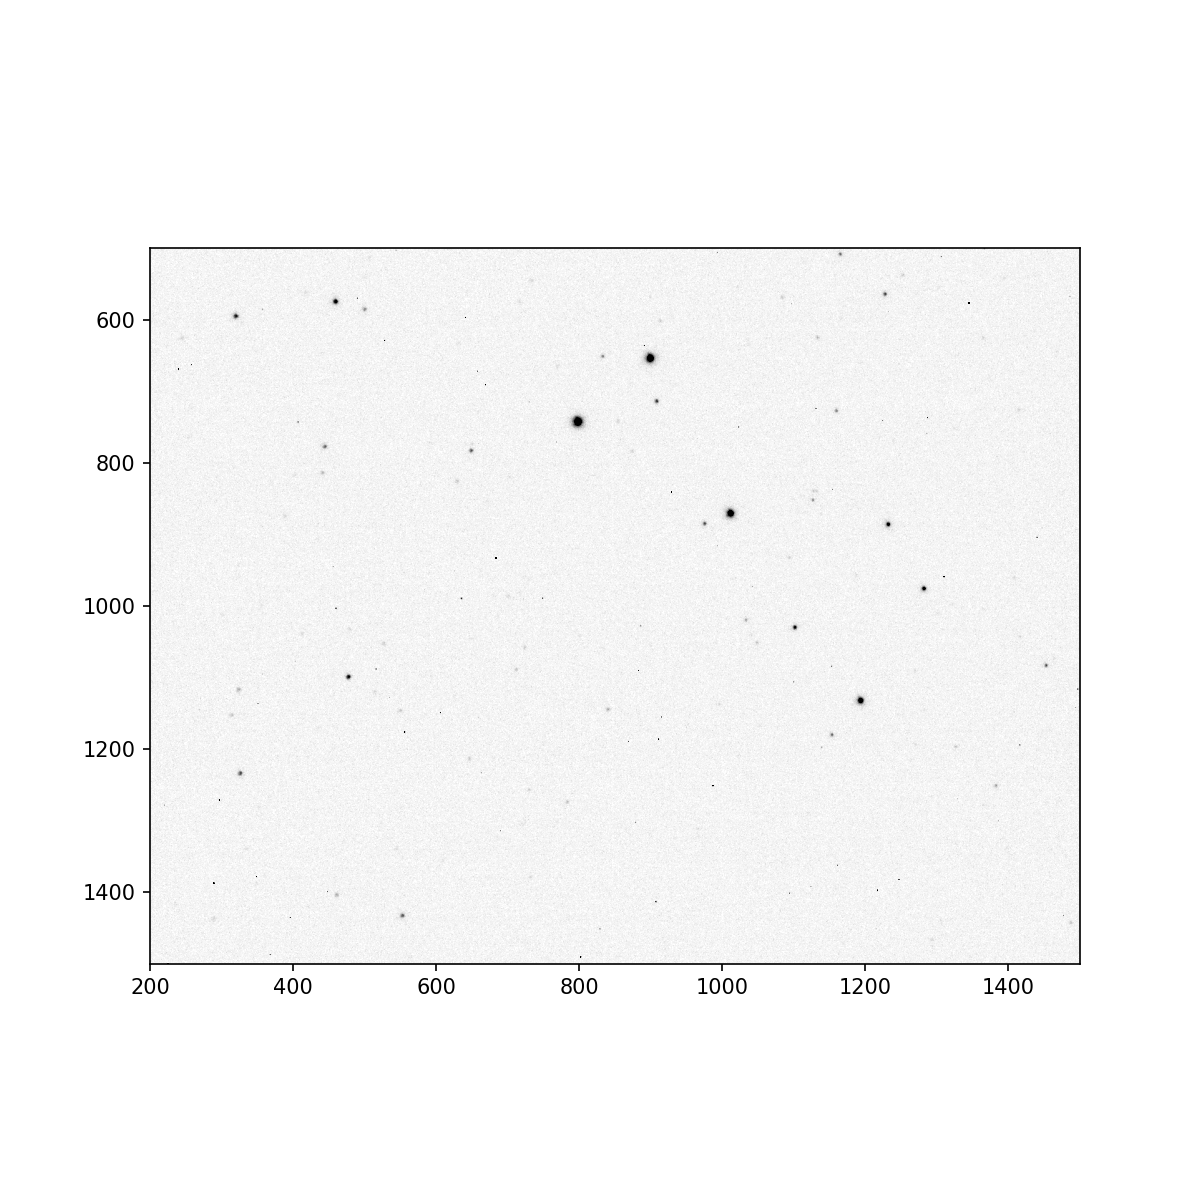

In [6]:
print('And lets zoom in on the image. This is starting to look familar right? (look at the triangle formation of stars) Compare with the Figure (113) I loaded in from the paper above.')
mincutoff, maxcutoff = 200, 800
xmin, xmax = 200, 1500
ymin, ymax = 1500, 500

%matplotlib notebook
plt.figure(figsize=(8,8))
plt.imshow(im, norm=LogNorm(vmin=mincutoff, vmax=maxcutoff), cmap='Greys')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
# norm=LogNorm(vmin=mincutoff, vmax=maxcutoff), cmap='Greys') are just additional arguments to make this plot
# look more like the one from the paper with lists of standard stars.
plt.show()

### Problem 5 (if you completed this on Lab 1 already -- then ignore this, write "already completed" in the answer box, and move on):

Mess around with the xmin, xmax, ymin, ymax, mincutoff, maxcutoff values above until you are roughly around the same region as in the photo. Different telescopes take pictures in different orientations and so initial orientations may differ. Just like how one friend might take a picture in portrait mode while you use landscape.

Insert those xmin, xmax ... etc values here and show the final image (i.e., copy and pasting the code from the above cell).

Bonus challenge: modify the code slightly using numpy rot90 to rotate the image (https://numpy.org/doc/stable/reference/generated/numpy.rot90.html) and numpy flip (https://numpy.org/doc/stable/reference/generated/numpy.flip.html) to get the image even closer to that in the original figure!

<IPython.core.display.Javascript object>


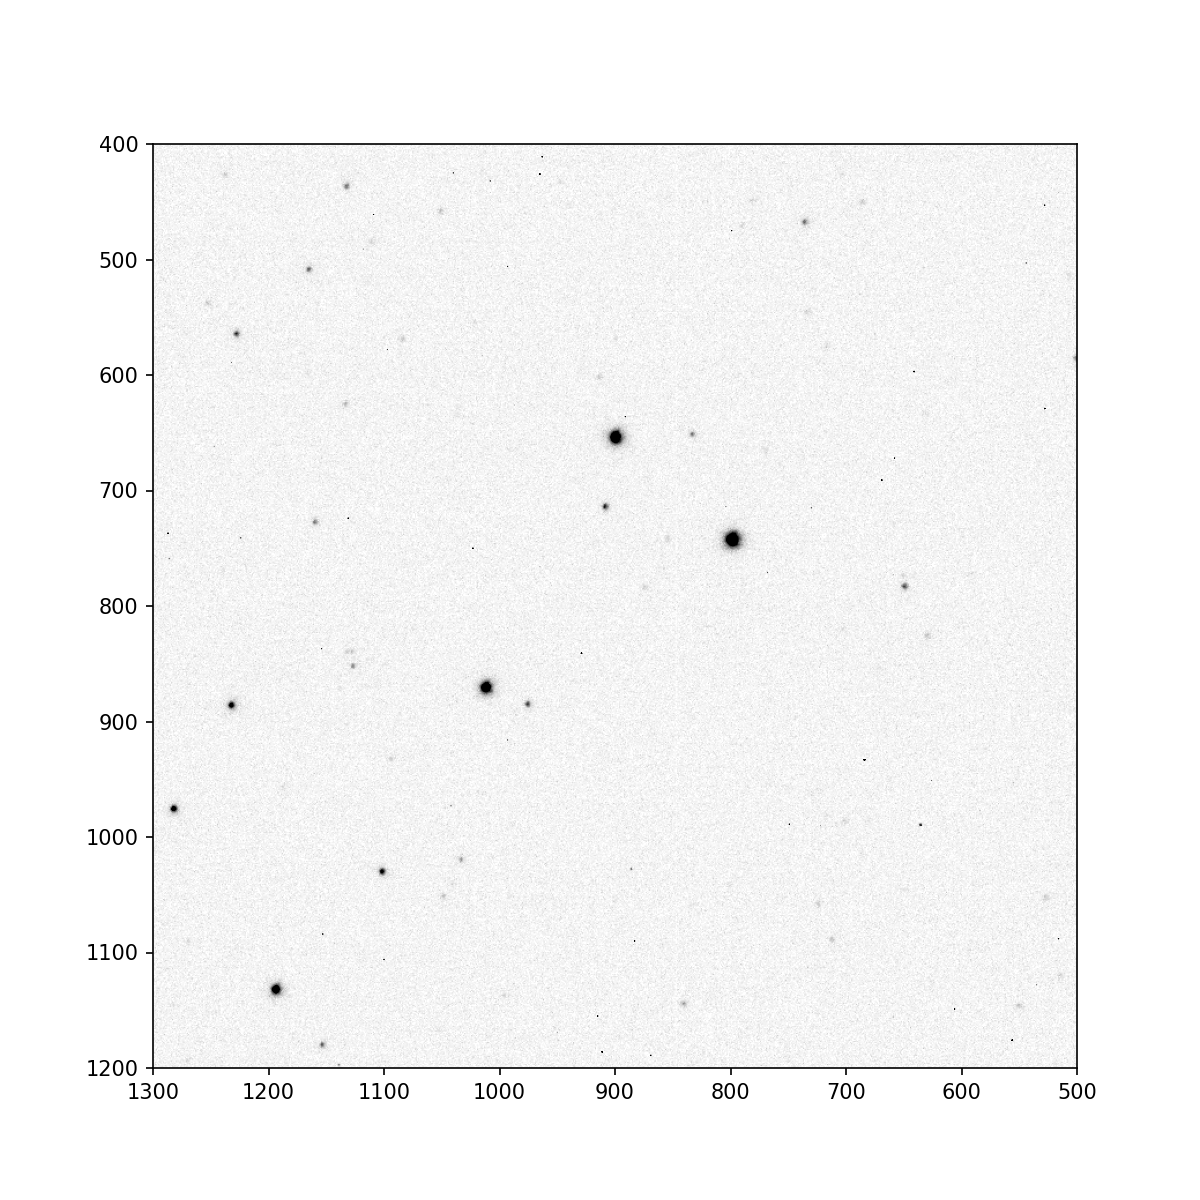

In [7]:
mincutoff, maxcutoff = 200, 800
xmin, xmax = 1300, 500
ymin, ymax = 1200, 400

%matplotlib notebook
plt.figure(figsize=(8,8))
plt.imshow(im, norm=LogNorm(vmin=mincutoff, vmax=maxcutoff), cmap='Greys')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
# norm=LogNorm(vmin=mincutoff, vmax=maxcutoff), cmap='Greys') are just additional arguments to make this plot
# look more like the one from the paper with lists of standard stars.
plt.show()

This is just a reproduction of the figure to help you find the region


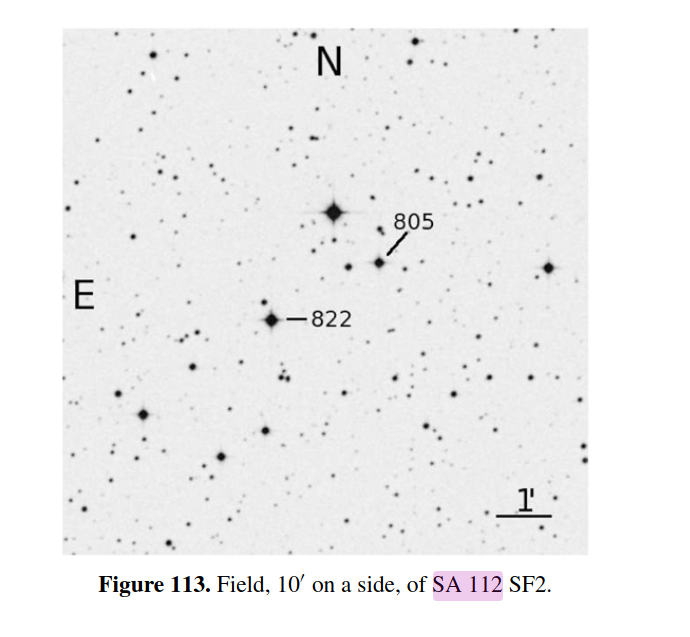

In [8]:
print('This is just a reproduction of the figure to help you find the region')
Image('lab1_resources/SA_112_field_SF2.png')

End of problem 5

# Switch drivers.

## Git commit -a -m "your message" , git push
## then the new driver should git pull and begin sharing their screen.

### Problem 6 (if you completed this on Lab 1 already -- then ignore this, write "already completed" in the answer box, and move on):

Zoom around the image that you created and find the pixel coordinate location of both SA 112 822 and 805. Enter those in the cell below in the form of (x, y). What is the corresponding value of the center pixel of SA 822 ? It is the value in the brackets [] in the matplotlib window when you hold your cursor over it.

Note that a count of 1e+3 means 1000 = 10^3. The python e+N corresponds to powers of 10, i.e., e+N means 10^N, and e-N means 10^-N .

If you rotated or flipped the image, this pixel coordinate will be with respect to the rotated image. Be careful here.

SA 112 = (900,652) 
SA 822 = (1011, 867) 2520
SA 805 = (800,740)

End of problem

### Problem 7 (even if you have already done this on lab 1, try redoing this with perhaps a more elegant solution):

Given your star positions for 822 and 805. Do a handful of things, creating a cell for each sub problem.

Problem 7.1: Give me the total counts within a reasonably sized box around both stars. I.e., this is the total brightness of both stars in detector units. Give these sums the variable names: brightness_822 and brightness_805

Problem 7.2: Find the total counts within the exact same sized box, but in a region where you do not see any stars. This 'brightness' (of just the dark sky) is called the sky background. Call this brightness_sky. calculate  brightness_822 - brightness_sky and brightness_805 - brightness_sky. How close are these two values? subtracting off the sky brightness is step one of calculating what is called the instrumental magnitude. Make sure your sky brightness extraction region (the size of the box over which you summed the dark sky) is the same as the size of the box over which you extracted the star.


Note it is ok and recommended to define your own functions here. But if you are unfamiliar with those, no worries. Your group can consult https://www.w3schools.com/python/python_functions.asp if none are familar and you want to attempt this with functions.

In [9]:
brightness_822 = np.sum(im[861:874,1000:1020])
print(brightness_822)
brightness_805 = np.sum(im[730:749,789:810])
print(brightness_805)

180944.53
394345.03


In [10]:
brightness_sky_822 = np.sum(im[916:929,850:870])
print(brightness_822-brightness_sky_822)
brightness_sky_805 = np.sum(im[916:935,850:871])
print(brightness_805-brightness_sky_805)

121514.06
303749.7


# Switch drivers.

## Git commit -a -m "your message" , git push
## then the new driver should git pull and begin sharing their screen.

Problem 7.4: vary the width of the box over which you are summing the counts (this is called the aperture width). What happens to the "brightness" of each source? What about the sky subtracted brightness? Comment on why we are subtracting the sky brightness from the source brightness (this should become apparent now).



7.4) As the box gets larger, the total brightness increases. By subtracting sky brightness, we can see the stars alone. 

### Problem 8:

Astronomers don't usually ever report the instrument counts for a source, as you did above, they first calculate what is called an instrumental magnitude. Read equation 14 here (http://star-www.rl.ac.uk/docs/sc6.htx/sc6se10.html#x11-2100010) and define a python function for me (following the format of example_function_inst_mag() below) that calculates the instrumental magnitude. Set A = 100.  Name your function something different, like inst_mag or instrument_magnitudes.

Note that numpy has functions for log10. Numpy has functions for
nearly every mathematical operation you would need.

You will also need the exposure time (in seconds) of the frame. The cell below has that.

In the cell after that, calculate the instrumental magnitudes, using your function, of 822 and 805.

In [12]:
# hdu_list[1].header behaves like a python dictionary https://www.w3schools.com/python/python_dictionaries.asp
exposure_time = hdu_list[1].header['EXPTIME']
# the header contains a plethora of information from the observatory
# about this particular exposure. Feel free to explore it with
# print(hdu_list[1].header)


def inst_magnitudes(source_counts, sky_counts, exposure_time, A=100):
    inst_mag = A - (2.5*np.log10((source_counts - sky_counts) / exposure_time)) 
    # you won't want inst_mag = None. You'll want to calculate it!
    return inst_mag

# Note that A=100 is what is called a keyword argument. The default value is 100 as I have defined it. 
# But I could have set A = 'anything' or A= None   ... When I run the function, A will always be 100 unless I call
# the function with a redefined value of A, e.g., via:
source_counts, sky_counts = 1, 2 # just some dummy values for these two variables. This makes it so we dont
# get an error when we call the function.
example_function_inst_mag(source_counts, sky_counts, exposure_time, 300)
# or
example_function_inst_mag(source_counts, sky_counts, exposure_time, A=300)

NameError: name 'example_function_inst_mag' is not defined

In [13]:

# get an error when we call the function.
inst_magnitudes(brightness_805, brightness_sky_805, exposure_time, 100)

91.17861675187551

End of problem

# Switch drivers.

## Git commit -a -m "your message" , git push
## then the new driver should git pull and begin sharing their screen.

### Problem 8.1

Now with the instrumental magnitudes in hand:
Subtract the instrumental magnitudes. Which star has a smaller magnitude? By how much is it smaller? 
By contrast, which star has the largest brightness?

Make sure that the brighter star has a more negative (smaller) magnitude. Remember this is how it should be! Brighter stars have smaller magnitudes!

The published magnitude difference is 0.332 from https://ui.adsabs.harvard.edu/abs/1992AJ....104..340L/abstract , https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=II/183A 

How close did you get to the published difference? If everything went well, you should have gotten pretty close. So there you go -- you just reproduced your first published science result!!

End of problem

## Part 2: Propagation of errors.

In the sciences, "error" and "uncertainty" are used interchangeably. Error and uncertainty refer to how well you know some quantity. Saying that the sun is 2E30 kilograms is meaningless in science, because there is no associated uncertainty. No one can compare your measurement to a new measurement. You need an associated uncertainty: for instance 2E30 kilograms +- 7E25 kg.

propagation of errors refers to the process of adding uncertainties to arrive at a final uncertainty measurement. E.g. how do we arrive at 7E25 kg for the uncertainty in the mass of the sun? Note that the uncertainty in the mass of the sun is about 10 earth masses...

For this part of the lab, you will learn two ways of calculating errors and propagating them.

In [8]:
# We of course need the error array, so lets get that:

error_im = hdu_list['ERR'].data

The square of the error array is called the variance array.
Now for the first rule.
When adding two measurements, each with a variance of X, the variance of the addition is X + X.

So lets say we have two flux measurements in two pixels: 500, 600. And let their errors be 50, and 80.
The "error" is how much we expect that flux measurement to vary, within that pixel, if we were to repeat the exact same exposure.

So the two measurements (flux, error_onflux) are:
(500, 50)
(600, 80)

And in terms of the variance, these are (flux, variance_of_flux)

(500, 2500)
(600, 6400)

So the addition of the two fluxes, yields a single measurement of:
(1100, 8900)

But the second value is the variance! We want the error or uncertainty. That is just the square root of the variance.

So our new measurement (flux, error_on_flux) is 
(1100, 94.3)

### Problem 9

Using the above logic, compute the variance AND uncertainty of: brightness_822, and brightness_805, and brightness_sky.
Remember that the variance per pixel is given by error_im ** 2


I recommend defining a "variance image" by:


var_image = error_im ** 2


To help you out with the measurement, the signal to noise on brightness_822 should be between 300 and 600. Remember that the signal to noise is  brightness_822/err_brightness_822      . Note that the denominator is the error NOT the variance.

End of problem 9

### Problem 10

But remember that astronomers work in magnitudes. So we have the variance of the brightness measurements in wierd instrument units... But we want the variance in the magnitude measurement.

But the magnitude is the log base 10 of the fluxes!! This is confusing. How do we transform our errors and variances once we apply some function?

Well there are two ways. We will first do the approximate method. Then there is a better, more rigorus method that we will use called "formal propagation of errors". Formal propagation of errors follow specific rules for various functions.

First the approximate method (for 805 for example):

We know that err_brightness_805 is the typical brightness fluctuation we might observe for the 805 star (in a identical repeat experiment). err_brightness_sky is the analagous fluctuation for the sky. So, worst case scenario (the dimmest we could ever measure the brightness_805 - brightness_sky) is if brightness_805 is the faintest, and brightness_sky is the brightest.

So the smallest (brightness_805 - brightness_sky) should (typically) be is


(faintest source, brightest sky)


brightness_805 - err_brightness_805 - (brightness_sky + err_brightness_sky)


While the largest is (faintest sky, brightest source):


brightness_805 + err_brightness_805 - (brightness_sky - err_brightness_sky)

Therefore, go ahead and compute the instrumental magnitudes between those two cases. Call them:


inst_mag_faintest


inst_mag_brightest

Then do 


inst_mag_error_estimate = inst_mag_brightest - inst_mag_faintest

inst_mag_error_estimate is a rough and dirty estimate of the instrumental magnitude error.

Repeat the same above experiment for the standard star 822. Report the two instrumental magnitude errors.

End of problem 10

### Problem 11

Formal propagation of errors follow specific rules for various functions. As an astronomer, you should bookmark this table here: https://en.wikipedia.org/wiki/Propagation_of_uncertainty (see example formulae):

![<caption>](lab3_resources/propagation_of_uncertainty.png)
    
    
A and B here are the two measurements, and lowercase a and b are constants (values with effectively ZERO uncertainty, like pi). A and B would be for example, two flux measurements. Maybe brightness_805 and brightness_822. $\sigma$ is the uncertainty, and $\sigma^2$ the variance. For convenience, we define the time normalized sum of the flux and sky brightness as $f_t$ and its variance as $\sigma^2_{ft}$:
$$
f_t = \frac{{\rm brightness\_star} - {\rm brightness\_sky}}{\rm exposure\_time}
$$

and

$$
\sigma^2_{ft} = \frac{{\rm var\_brightness\_star} + {\rm var\_brightness\_sky}}{{\rm exposure\_time}^2}
$$
    
One can follow the formal propagation of uncertainty (and I encourage you to do so out of lab as an exercise). And you will find that the uncertainty propagation for our magnitude calculation is:
$$
\sigma^2_{\rm magnitude} = \sigma^2_{ft} \left( \frac{2.5}{f_t \ln(10)} \right)^2 
$$

    
Note that $\ln$ denotes the natural log. This is np.log() . In contrast to log-base-10, np.log10()

The problem for you to is to implement this into a function and answer the following questions:
    
    1. What is the uncertainty on the instrumental magnitude of 805. What is the uncertainty on the instrumental mangitude of 822? I recommend, as usual, to define a function to calculate this magnitude error estimate.
    2. How close are these to the rough and dirty estimate from before? They should be within a factor of 2. 
    3. Which method is more prone to user error?

The take away is that the rough estimate method can always be used as a way to check your more rigorous calculation. Both are therefore important tools to have in your toolbelt. You can cross compare the two to check them, before you publish a paper with a mistake :)  In general, it is EXTREMELY useful in astronomy to be able to do any calculation in two different ways.

End of problem 10

### Problem 12:
#### This is a large problem, so switch drivers as you see fit.

Using snippits of the code in this notebook, and googling, repeat the above analysis for the set of four images contained in the zip at https://drive.google.com/file/d/1sqvipqYnnhlfTJXSUI_EZpNaGn9HDDbw/view?usp=sharing. This is a set of observations of the same stars but from a different telescope. Note that the pixel coordinates of the stars are going to be different, and might shift slightly within the set.

Shifts occur because the telescope cannot maintain its orientation perfectly as it tracks the stars in the sky. The technical term for this is the "pointing". Telescopes have errors in pointing.


Make a plot of inst_mag_822 and inst_mag_805 for each of the 4 images. So you should produce two line plots, each with 4 points.

As well, include the error bars with each point. So use plt.errorbar().

1. How much do the values vary? Do they fluctuate more than the error bars (meaning, can I run a *flat* line through the points without ever exiting an error bar? Imagine that each point + error bar is a ring on a post, and you are trying to run a straight rod through them while keeping it entirely flat.)

2. Why might they be varying?

### Problem 12.1 (Bonus Problem)

Then plot instead brightness_822/brightness_805 . So just one line plot with 4 points on it (again with error bars). How much do these points vary? Do they vary less or more than the previous plots? Why might that be?

End of problem and lab!